In [11]:
import csv
import random
from google.colab import files

# Step 1: Generating pairwise similarity scores for 24 individuals
num_individuals = 24
similarity_scores = [[random.randint(0, 20) for _ in range(num_individuals)] for _ in range(num_individuals)]

# Ensuring symmetry in similarity scores
for i in range(num_individuals):
    for j in range(i + 1, num_individuals):
        similarity_scores[j][i] = similarity_scores[i][j]

# Writing the similarity scores to a CSV file
with open('similarity_scores.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(similarity_scores)

# Download the CSV file
files.download('similarity_scores.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Final Optimal Grouping:
Group 1: [11, 21, 9, 12], Fitness: 78
Group 2: [19, 3, 20, 5], Fitness: 70
Group 3: [14, 4, 23, 17], Fitness: 81
Group 4: [0, 10, 18, 16], Fitness: 53
Group 5: [15, 6, 8, 13], Fitness: 71
Group 6: [2, 1, 22, 7], Fitness: 92

Cumulative Fitness of Final Optimal Grouping: 445
Generation where the best grouping is found: 84


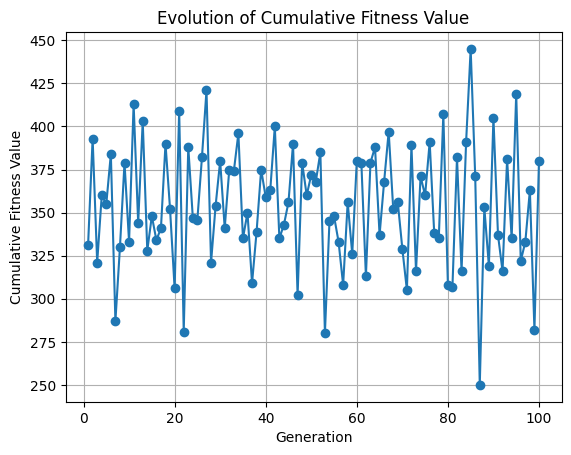

In [16]:
def genetic_algorithm(similarity_scores, generations=100):
    cumulative_fitness_values = []

    best_cumulative_fitness = float('-inf')
    best_grouping = None
    best_generation = None
    cumulative_fitness_at_best = None

    for gen in range(generations):
        elite_groups = []
        remaining_groups = []

        # Initial population
        population = generate_initial_population(6, len(similarity_scores[0]))

        # Evaluate fitness of each group
        cumulative_fitness = 0
        for group in population:
            fitness = calculate_fitness(group, similarity_scores)
            cumulative_fitness += fitness
            if len(elite_groups) < 2:
                elite_groups.append((group, fitness))
            else:
                remaining_groups.append((group, fitness))

        # Record cumulative fitness value of this generation
        cumulative_fitness_values.append(cumulative_fitness)

        # Update best cumulative fitness value and grouping
        if cumulative_fitness > best_cumulative_fitness:
            best_cumulative_fitness = cumulative_fitness
            best_grouping = population
            best_generation = gen
            cumulative_fitness_at_best = cumulative_fitness

        # Breed non-elite groups
        new_population = []
        for i in range(0, len(remaining_groups), 2):
            if i + 1 < len(remaining_groups):
                group1, group2 = remaining_groups[i][0], remaining_groups[i + 1][0]
                new_group1, new_group2 = breed(group1, group2)
                new_population.extend([new_group1, new_group2])

        # Mutate new population
        mutated_population = []
        for group in new_population:
            mutated_population.append(mutate(group))

        # Evaluate fitness of mutated groups
        mutated_fitness = [(group, calculate_fitness(group, similarity_scores)) for group in mutated_population]

        # Select top two elite groups among mutated groups
        mutated_fitness.sort(key=lambda x: x[1], reverse=True)
        elite_mutated = mutated_fitness[:2]

        # Combine elite groups from current generation with elite mutated groups
        elite_generation = elite_groups + elite_mutated

        # Sort elite generation by fitness value
        elite_generation.sort(key=lambda x: x[1], reverse=True)

        # Calculate cumulative fitness of elite generation
        elite_cumulative_fitness = sum(fitness for _, fitness in elite_generation)

        # Update best cumulative fitness value and grouping
        if elite_cumulative_fitness > best_cumulative_fitness:
            best_cumulative_fitness = elite_cumulative_fitness
            best_grouping = [group for group, _ in elite_generation]
            best_generation = gen
            cumulative_fitness_at_best = elite_cumulative_fitness

    return best_grouping, cumulative_fitness_values, best_generation, cumulative_fitness_at_best

if __name__ == "__main__":
    similarity_scores = load_similarity_scores('similarity_scores.csv')
    optimal_grouping, cumulative_fitness_values, best_generation, cumulative_fitness_at_best = genetic_algorithm(similarity_scores, generations=100)

    print("\nFinal Optimal Grouping:")
    for i, group in enumerate(optimal_grouping, start=1):
        fitness = calculate_fitness(group, similarity_scores)
        print(f"Group {i}: {group}, Fitness: {fitness}")

    print(f"\nCumulative Fitness of Final Optimal Grouping: {cumulative_fitness_at_best}")
    print(f"Generation where the best grouping is found: {best_generation}")

    plot_fitness_evolution(cumulative_fitness_values)
